In [1]:
import kaggle
import numpy as np
!kaggle competitions download -c 1056lab-credit-card-fraud-detection

1056lab-credit-card-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import os
from zipfile import ZipFile
file = os.listdir()
if "data" in file:
    for i in file:
        if i.endswith(".zip"):
            file_path = os.getcwd() +"/"+ i
            ZipFile(file_path).extractall(os.getcwd()+"/data")
            break
else:
    for i in file:
        if i.endswith(".zip"):
            os.makedirs(os.getcwd()+"/data")
            file_path = os.getcwd() + "/" + i
            ZipFile(file_path).extractall(os.getcwd()+"/data")
            break


In [3]:
import pandas as pd
def get_data():
    train_data = pd.read_csv(os.getcwd()+"//data/train.csv")
    test_data = pd.read_csv(os.getcwd()+"//data/test.csv")
    return train_data, test_data

In [4]:
train_data, test_data = get_data()

In [5]:
sub_data = pd.read_csv("D:\my work\kaggle\credit card fraud detection\data\sampleSubmission.csv")

In [6]:
train_data.head()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198365 entries, 0 to 198364
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      198365 non-null  int64  
 1   Time    198365 non-null  float64
 2   V1      198365 non-null  float64
 3   V2      198365 non-null  float64
 4   V3      198365 non-null  float64
 5   V4      198365 non-null  float64
 6   V5      198365 non-null  float64
 7   V6      198365 non-null  float64
 8   V7      198365 non-null  float64
 9   V8      198365 non-null  float64
 10  V9      198365 non-null  float64
 11  V10     198365 non-null  float64
 12  V11     198365 non-null  float64
 13  V12     198365 non-null  float64
 14  V13     198365 non-null  float64
 15  V14     198365 non-null  float64
 16  V15     198365 non-null  float64
 17  V16     198365 non-null  float64
 18  V17     198365 non-null  float64
 19  V18     198365 non-null  float64
 20  V19     198365 non-null  float64
 21  V20     19

In [8]:
train_data.describe()

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,...,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000,198365.000000
mean,99183.000000,70130.934414,-0.107339,0.004431,0.325762,0.077514,-0.113668,0.046607,-0.051740,0.017719,...,-0.014966,-0.049185,-0.015766,0.004333,0.061965,0.006424,0.001587,0.001976,89.703525,0.001931
std,57263.187411,34305.103318,1.891453,1.622666,1.446295,1.398805,1.360659,1.310315,1.216025,1.210508,...,0.738678,0.690646,0.610795,0.603471,0.490441,0.488446,0.394026,0.314154,248.680051,0.043898
min,1.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,49592.000000,44128.000000,-0.962685,-0.580147,-0.327270,-0.790975,-0.785452,-0.709602,-0.576733,-0.180360,...,-0.227188,-0.538206,-0.168622,-0.341607,-0.238794,-0.331187,-0.067367,-0.041312,5.990000,0.000000
50%,99183.000000,67005.000000,-0.094105,0.082136,0.496715,0.078139,-0.171469,-0.218506,-0.010989,0.043647,...,-0.043309,-0.035961,-0.029126,0.052775,0.104492,-0.061019,0.006036,0.018528,22.990000,0.000000
75%,148774.000000,90198.000000,1.213058,0.783763,1.225320,0.889229,0.462401,0.444661,0.499504,0.339098,...,0.150027,0.421133,0.114667,0.421534,0.384995,0.261761,0.089128,0.078235,79.200000,0.000000
max,198365.000000,132458.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [9]:
train_data.shape

(198365, 32)

In [10]:
train_data.isnull().sum()

ID        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>],
       [<AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>],
       [<AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V2

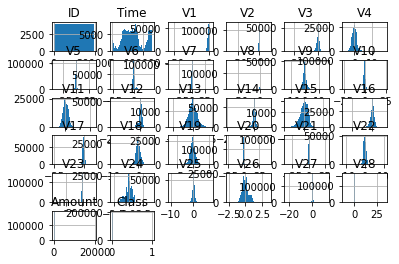

In [11]:
import matplotlib.pyplot as plt
train_data.hist(bins = 50)

In [12]:
train_data.drop("ID", axis = 1, inplace=True)

In [13]:
corr_matrix = train_data.corr()
corr_matrix["Class"]


Time     -0.011819
V1       -0.130645
V2        0.114304
V3       -0.245296
V4        0.147454
V5       -0.129550
V6       -0.048708
V7       -0.238810
V8        0.024672
V9       -0.107591
V10      -0.256572
V11       0.171352
V12      -0.277587
V13      -0.002912
V14      -0.326658
V15      -0.008347
V16      -0.235174
V17      -0.385728
V18      -0.141394
V19       0.042972
V20       0.021344
V21       0.048237
V22       0.001755
V23      -0.001788
V24      -0.005281
V25       0.001264
V26       0.003017
V27       0.019514
V28       0.007520
Amount    0.005174
Class     1.000000
Name: Class, dtype: float64

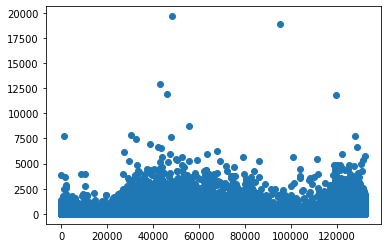

In [14]:
plt.scatter(train_data["Time"], train_data["Amount"])

In [15]:
train_data["Actual_Amount"] = train_data["Time"] * train_data["Amount"]
l1 = [x for x in train_data.columns if train_data[x].dtype=="float64" and "V" in x]
l1

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [16]:
import numpy as np
#l = np.zeros(train_data.shape[0], train_data[1])
train_data["V"] = 0
for i in l1:
    train_data["V"] = train_data["V"] + train_data[i]
train_data["V"]

0         3.081757
1         4.439726
2         1.091311
3        -2.409596
4         5.378728
            ...   
198360    1.245912
198361   -5.887309
198362   -0.178526
198363   -3.293118
198364    2.197946
Name: V, Length: 198365, dtype: float64

In [17]:
corr_matrix = train_data.corr()
corr_matrix["Class"]

Time            -0.011819
V1              -0.130645
V2               0.114304
V3              -0.245296
V4               0.147454
V5              -0.129550
V6              -0.048708
V7              -0.238810
V8               0.024672
V9              -0.107591
V10             -0.256572
V11              0.171352
V12             -0.277587
V13             -0.002912
V14             -0.326658
V15             -0.008347
V16             -0.235174
V17             -0.385728
V18             -0.141394
V19              0.042972
V20              0.021344
V21              0.048237
V22              0.001755
V23             -0.001788
V24             -0.005281
V25              0.001264
V26              0.003017
V27              0.019514
V28              0.007520
Amount           0.005174
Class            1.000000
Actual_Amount    0.003437
V               -0.374909
Name: Class, dtype: float64

In [18]:
corr_matrix = train_data.corr()
corr_matrix["Class"]

Time            -0.011819
V1              -0.130645
V2               0.114304
V3              -0.245296
V4               0.147454
V5              -0.129550
V6              -0.048708
V7              -0.238810
V8               0.024672
V9              -0.107591
V10             -0.256572
V11              0.171352
V12             -0.277587
V13             -0.002912
V14             -0.326658
V15             -0.008347
V16             -0.235174
V17             -0.385728
V18             -0.141394
V19              0.042972
V20              0.021344
V21              0.048237
V22              0.001755
V23             -0.001788
V24             -0.005281
V25              0.001264
V26              0.003017
V27              0.019514
V28              0.007520
Amount           0.005174
Class            1.000000
Actual_Amount    0.003437
V               -0.374909
Name: Class, dtype: float64

In [19]:
train_data["Class"].unique()


array([0, 1], dtype=int64)

In [20]:
l1 = [x for x in train_data.columns if x != "Class"]
l1

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Actual_Amount',
 'V']

In [21]:
X = train_data[l1]
y = train_data["Class"]

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
from sklearn.ensemble import  RandomForestClassifier
forest_reg = RandomForestClassifier()
forest_reg.fit(X,y)

RandomForestClassifier()

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X, y,
                         scoring="accuracy", cv=10)

KeyboardInterrupt: 

In [ ]:
scores

In [25]:
from sklearn.svm import SVC
SVC_clf = SVC()
SVC_clf.fit(X,y)

SVC()

In [ ]:
from sklearn.model_selection import cross_val_score
scores_SVC = cross_val_score(SVC_clf, X, y,
                         scoring="accuracy", cv=10)

In [ ]:
scores_SVC

In [26]:
y_forest_pred = forest_reg.predict(X)
y_SVC_pred = SVC_clf.predict(X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_forest_pred, y)
cm

array([[197982,      0],
       [     0,    383]], dtype=int64)

In [27]:
cm_svc = confusion_matrix(y_SVC_pred, y)
cm_svc

array([[197974,     59],
       [     8,    324]], dtype=int64)

In [28]:
count = 0
for i in train_data["Class"]:
    if i == 1:
        count = count + 1
print(count)

383


So from the above matrix we can clearly see that random forest makes the model much more accurate
Random forest will be used for testing as well



In [29]:
test_data


,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,198366,132459,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,...,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,0.99
1,198367,132460,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,...,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,183.02
2,198368,132460,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,...,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,21.00
3,198369,132460,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,...,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,35.00
4,198370,132461,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,...,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86437,284803,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
86438,284804,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
86439,284805,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
86440,284806,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [30]:
sub_data


,ID,Class
0,198366,0
1,198367,0
2,198368,0
3,198369,0
4,198370,0
...,...,...
86437,284803,0
86438,284804,0
86439,284805,0
86440,284806,0


In [31]:
test_data.drop("ID", axis=1, inplace=True)

In [32]:
#test_data.drop("ID", axis=1, inplace=True)
test_data["Actual_Amount"] = test_data["Time"] * test_data["Amount"]
l1 = [x for x in test_data.columns if test_data[x].dtype=="float64" and "V" in x]
test_data["V"] = 0
for i in l1:
    test_data["V"] = test_data["V"] + test_data[i]
test_data["V"]

0       -2.798623
1       -0.400558
2       -5.236415
3        1.058044
4        2.399819
           ...   
86437   -0.204756
86438    0.536769
86439    6.784787
86440    5.644074
86441   -2.417888
Name: V, Length: 86442, dtype: float64

In [33]:
sub_data.drop("ID", axis=1, inplace=True)

In [34]:
test_data = sc.transform(test_data)

In [35]:
y_test_pred_forest = forest_reg.predict(test_data)
y_test_pred_SVC = SVC_clf.predict(test_data)

In [36]:
from sklearn.metrics import confusion_matrix
cm_test_forest = confusion_matrix(y_test_pred_forest, sub_data)
cm_test_forest

array([[86369,     0],
       [   73,     0]], dtype=int64)

In [37]:
cm_test_SVC = confusion_matrix(y_test_pred_SVC, sub_data)
cm_test_SVC


array([[86395,     0],
       [   47,     0]], dtype=int64)

In [38]:
type(y_test_pred_forest)

numpy.ndarray

In [58]:
test_data_1 = pd.read_csv("D:\my work\kaggle\credit card fraud detection\data\\test.csv")
test_data_1

,ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,198366,132459,2.079192,0.052662,-1.755167,0.418802,0.310472,-0.886053,0.083326,-0.149153,...,-0.250318,-0.385564,-1.074903,0.351592,0.441535,-0.300612,0.179993,-0.072265,-0.034296,0.99
1,198367,132460,1.596563,-1.588177,-1.186718,-1.710578,-0.378661,0.906028,-0.796517,0.443712,...,0.016012,0.395564,0.993546,-0.024412,-1.613532,-0.392005,-0.055686,0.033064,-0.042575,183.02
2,198368,132460,2.273454,-1.447207,-0.946779,-1.738063,-1.074172,-0.139592,-1.266807,-0.047025,...,-0.384806,-0.142609,0.098889,0.150236,-0.813565,-0.193346,-0.148293,0.020379,-0.063042,21.00
3,198369,132460,1.987406,0.140840,-2.001286,1.071763,0.717042,-0.880590,0.670095,-0.288313,...,-0.274861,0.158934,0.427937,-0.082711,-0.493515,0.434758,-0.473680,-0.045832,-0.075119,35.00
4,198370,132461,-0.398751,1.370313,-0.715049,-0.867699,1.157188,-0.364107,1.151124,-0.316554,...,0.475877,0.182382,1.126963,-0.183504,0.047153,-0.570891,-0.222038,0.657472,0.278362,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86437,284803,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
86438,284804,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
86439,284805,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
86440,284806,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [59]:
df = pd.DataFrame(y_test_pred_forest, columns=['Class'])
df.to_csv('submission.csv', index=False)

In [2]:
import pandas as pd
submission = pd.read_csv("D:\my work\kaggle\credit card fraud detection\submission.csv")
submission

,Class
0,0
1,0
2,0
3,0
4,0
...,...
86437,0
86438,0
86439,0
86440,0


In [4]:
id = []
for i in range(198366, 284808):
    id.append(i)
submission.insert(0, 'ID', id)


ValueError: cannot insert ID, already exists

In [6]:
submission.to_csv("final_submission.csv")